In [37]:
import csv
import numpy as np
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk.stem
from sklearn.metrics import classification_report,confusion_matrix
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet, stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from yellowbrick.classifier import ConfusionMatrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer
from scipy.sparse import hstack
# Import necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
import string
import re
from sklearn.preprocessing import LabelEncoder
import os
import pickle
import sys
from IPython.display import display, HTML
import urllib
import gzip
import nltk
from nltk import tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import pip

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KarthikeyanNatarajan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KarthikeyanNatarajan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KarthikeyanNatarajan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
def cleaning(s):
    
    s = str(s)
    #s = str.split(s)
    s = s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', '', s)
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    s = re.sub(r'https?:\/\/.*[\r\n]*', '', s, flags=re.MULTILINE)
    s = re.sub(r'\<a href', ' ', s)
    s = re.sub(r'&amp;', '', s) 
    s = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', s)
    s = re.sub(r'[^\x00-\x7f]',r'',s) #removes arabic
    s = re.sub(r'<br />', ' ', s)
    s = re.sub(r'\'', ' ', s)
    
    return s

train['Text'] = [cleaning(s) for s in train['Text']]


NameError: name 'train' is not defined

In [44]:
def cleanString(review):
    stopWords = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    returnString = ""
    sentence_token = tokenize.word_tokenize(review)
    idx_list = []
    for j in range(len(sentence_token)):
        single_sentence = tokenize.word_tokenize(sentence_token[j])
        single_sentence=[lemmatizer.lemmatize(t) for t in single_sentence]
        single_sentence=[word for word in single_sentence if word.lower() not in stopWords]
        sentences_filtered = [(idx,lemmatizer.lemmatize(w.lower())) for idx,w in enumerate(single_sentence) 
                              if w.lower() not in stopWords and w.isalnum()]
        idx_list.append([x[0] for x in sentences_filtered])
        word_list = [x[1] for x in sentences_filtered]
        returnString = returnString + ' '.join(word_list) + ' '
    
    return returnString



In [45]:
def cleanData(string1):
    articles = []
    n = 1
    for i in range(n):
        temp_string = cleanString(string1)
        articles.append(temp_string)
        print(str(i+1)+' of '+str(n)+" articles cleaned.",end='\r')
    
    return(articles)

In [122]:
def tokenize_test(model,train,validation,num_comp):

    lsa = TruncatedSVD(n_components=200)
    X_test1 = char_vectorizer.transform(validation)
    X_test2 = word_vectorizer.transform(validation)
    test_stack = hstack([X_test1,X_test2])
    #train_text = vect.fit_transform(train["Text"])
    #print ('Features: ', train_text.shape[1])
    #test_text = vect.transform(validation["Text"])
   
    tsvd=TruncatedSVD(num_comp)
    train_features1 = tsvd.fit_transform(train_features)
    test_stack = tsvd.transform(test_stack)

    train_features1 = Normalizer(copy=False).fit_transform(train_features1)
    test_stack = Normalizer(copy=False).transform(test_stack)
    model.fit(train_features1, y_train)
    y_pred_class = model.predict(test_stack)
    
    print("Training Accuracy")
    print(model.score(train_features1,y_train))
    print("Testing Accuracy")
    print(model.score(test_stack,y_test))
    #print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))
    #print(classification_report(np.argmax(y_test,axis=1),y_pred_class,target_names=list(labelEncoder.classes_)))
    
    
    cm = ConfusionMatrix(model, classes=list(labelEncoder.classes_))



#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
    cm.score(test_stack, y_test)

#How did we do?
    cm.poof()
    #print(confusion_matrix(y_pred_class,validation["Code"]))


####################ACTUAL CODE STARTS FROM HERE

In [85]:
stats=pd.read_csv('Statistics_corpus.csv',encoding =  "ISO-8859-1")
#stats.columns=["a","Question","Sub_Topic_Code"]
labelEncoder = LabelEncoder()
stats["Topic_Name"] = labelEncoder.fit_transform(stats["Topic_Name"])
stats = stats.rename(columns={'Topic_Name': 'Category', 'Question': 'Text'})
data_df=stats.sample(frac=1).reset_index(drop=True)
data_df["cleantext"]=data_df.Text.apply(cleanString)

In [86]:
data_df

,Topic_Code,Sub_Topic_Code,Category,Text,cleantext
0,AASKK02,S0001,8,How to Summarizes data (Data and Histogram),summarizes data data histogram
1,AASKK02,S0015,12,When one tailed Hypothesis test is done,one tailed hypothesis test done
2,AASKK02,S0019,17,When to do Normalization,normalization
3,AASKK02,S0021,6,How to do Encoding of Categorical Data,encoding categorical data
4,AASKK02,S0001,8,What is Univariate Analysis,univariate analysis
...,...,...,...,...,...
102,AASKK02,S0014,9,Give some examnples of Binomial Distribution a...,give examnples binomial distribution applica...
103,AASKK02,S0010,15,Where probality is used in Machine Learning,probality used machine learning
104,AASKK02,S0018,19,When to do Chi Square test,chi square test
105,AASKK02,S0001,8,What is Multvariate Analysis,multvariate analysis


In [8]:
data_df

,Topic_Code,Category,Topic_Name,Text
0,AASKK02,17,Test of variance and Proportion,What is Chi Square test
1,AASKK02,1,Central Tendency and 3 Ms,What is median
2,AASKK02,19,Exploratory Data analysis,How to do Exploratory Data analysis
3,AASKK02,1,Central Tendency and 3 Ms,What are Central Tendency
4,AASKK02,17,Test of variance and Proportion,When to do Test of variance
...,...,...,...,...
102,AASKK02,7,Data Visualizations,Whta is Data Visualizations
103,AASKK02,11,Marginal Probablity,What is Marginal Probability
104,AASKK02,20,Data Preprocessing,What is Data Preprocessing
105,AASKK02,18,Scaling and Normalization,What are Normalization


In [88]:
def clean_data(data_df):
    articles = []
    n = data_df['Text'].shape[0]
    col_number = data_df.columns.get_loc('Text')
    stopWords = set(stopwords.words('english'))
    data_cleaned = data_df.copy()
    for i in range(n):
        temp_string= cleanString(data_df.iloc[i,col_number])
        articles.append(temp_string)
        print(str(i+1)+' of '+str(n)+" articles cleaned.",end='\r')
    
    data_cleaned.loc[:,'Text'] = pd.Series(articles,index=data_df.index)
    data_cleaned.loc[:,'Category'] = pd.Categorical(data_cleaned.Category)
    data_cleaned['Code'] = data_cleaned.Category.cat.codes
    categoryToCode = dict( enumerate(data_cleaned['Category'].cat.categories))
    return(data_cleaned)
data_cleaned=clean_data(data_df)
from sklearn.model_selection import train_test_split
y=data_cleaned["Code"]
X=data_cleaned["Text"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=23, stratify=y)

In [129]:
def cleanData(string1):
    articles = []
    n = 1


    for i in range(n):
        temp_string = cleanString(string1)
        articles.append(temp_string)
        print(str(i+1)+' of '+str(n)+" articles cleaned.",end='\r')
    
    return(articles)

In [90]:

def build_tokenizer(doc):
    token_pattern=r"(?u)\b\w+"
    token_pattern = re.compile(token_pattern)
    return token_pattern.findall(doc)


english_stemmer = nltk.stem.SnowballStemmer('english')
class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(TfidfVectorizer,self).build_analyzer()
        return lambda doc:(english_stemmer.stem(word) for word in analyzer(doc))
    
posts_root1=[]

for post in X_train:
    a=" ".join([english_stemmer.stem(word) for word in build_tokenizer(post)])
    posts_root1.append(a)

word_vectorizer = StemmedTfidfVectorizer(
    sublinear_tf=True,
    stop_words = 'english',
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1,3),
    dtype=np.float32,
    max_features=8000,
    
)
# Character Stemmer
char_vectorizer = StemmedTfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    ngram_range=(1, 6),
    dtype=np.float32,
    max_features=8000,
   
)



word_vectorizer.fit(posts_root1)
char_vectorizer.fit(posts_root1)

train_word_features = word_vectorizer.transform(posts_root1)
train_char_features = char_vectorizer.transform(posts_root1)


train_features = hstack([
    train_char_features,
    train_word_features])


filename = 'char_preprocessing.sav'
pickle.dump(word_vectorizer, open(filename, 'wb'))
filename = 'word_preprocessing.sav'
pickle.dump(char_vectorizer, open(filename, 'wb'))
print("feature_name:%s" % len(char_vectorizer.get_feature_names()))


feature_name:2254


In [138]:
def tokenize_test2(model,train,text):
    from sklearn.decomposition import NMF
    from sklearn.preprocessing import Normalizer
    print(text)
    X_test1 = char_vectorizer.transform(text)
    X_test2 = word_vectorizer.transform(text)
    test_stack = hstack([X_test1,X_test2])
    train_features1 = Normalizer(copy=False).fit_transform(train_features)
    test_stack = Normalizer(copy=False).transform(test_stack)
    model.fit(train_features, y_train)
    filename = 'model.sav'
    pickle.dump(model, open(filename, 'wb'))
    y_pred_class = model.predict(test_stack)
    return(y_pred_class)

In [54]:
def tokenize_test3(text):
    print(text)
    clntxt=cleanData(text)
    word_model = pickle.load( open( "word_preprocessing.sav", "rb" ) )
    char_model = pickle.load( open( "char_preprocessing.sav", "rb" ) )
    X_test1 = word_model.transform(clntxt)
    X_test2 = char_model.transform(clntxt)
    test_stack = hstack([X_test1,X_test2])
    model = pickle.load( open( "model.sav", "rb" ) )
    y_pred_class = model.predict(test_stack)
    print(y_pred_class)

In [62]:
tokenize_test3("how to close a file automatically when you use")

how to close a file automatically when you use
[6]


In [160]:
import pandas 
value=tokenize_test2(SVC(kernel = 'linear'),X_train,cleanData("How Hypothesis are formulated"))
out=labelEncoder.classes_[value]
import wikipediaapi
wiki_wiki = wikipediaapi.Wikipedia('en')
wikiResults = wikipedia.search(out)
result = wikiResults[0]
page_py = wiki_wiki.page(result)
print(page_py.fullurl)

[' hypothesis  formulated ']
https://en.wikipedia.org/wiki/Statistical_hypothesis_testing


In [153]:
page_py

Chi-squared test (id: ??, ns: 0)

In [93]:
target_strings

array(['Bayes theorem and Example', 'Central Tendency and 3 Ms',
       'Coefficient of Variation',
       'Concepts of sampling distribution and Central Limit Theorem',
       'Confidence Intervals and tests', 'Correlation Analysis',
       'Data Preprocessing', 'Data Visualizations', 'Data and Histogram',
       'Distributions and Example', 'Exploratory Data analysis',
       'Five Number Summary Boxplot and other plots',
       'Hypothesis Formulation and Tests', 'Marginal Probablity',
       'Measures of Dispersion Range and IQR',
       'Probability - Meaning and concepts',
       'Rules for Computing Probability', 'Scaling and Normalization',
       'Standard Deviation', 'Test of variance and Proportion',
       'The Empirical Rule and Chebyshev Rule'], dtype=object)

In [80]:
mlp=MLPClassifier(hidden_layer_sizes=(200, 200),activation='relu',solver = 'adam', alpha = 1e-5, learning_rate = 'adaptive', learning_rate_init = 0.005, max_iter = 500, random_state = 21)
target_strings = label_encoder.inverse_transform(np.arange(num_classes))
tokenize_test2(mlp,X_train,cleanData("how to close a file automatically when you use"),class1=list(range(0,y.nunique())))

['  close  file automatically   use ']
[9]


In [29]:
SGD=SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='modified_huber',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='none', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False)
import catboost
cls = catboost.CatBoostClassifier(loss_function='MultiClass',learning_rate=0.1, iterations=50, depth=8)
tokenize_test(cls,X_train,X_test,1500,class1=list(range(0,train["Code"].nunique())))



NameError: name 'train' is not defined

Training Accuracy
1.0
Testing Accuracy
0.8636363636363636
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      0.67      0.80         3
          14       1.00      1.00      1.00         2
          15       0.00      0.00      0.00         1
          16       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         1
          19       1.00      0.50      0.67         2
          20       1.00      1.00      1.00         1

    accuracy                           0.86        22
   macro avg       0.8

C:\Users\KarthikeyanNatarajan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KarthikeyanNatarajan\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KeyError: 'Code'

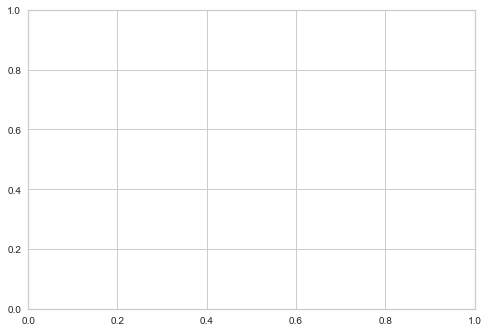

In [30]:
    from sklearn.ensemble import ExtraTreesClassifier
    SVM = SVC(kernel = 'linear', probability = False)
    from sklearn.ensemble import StackingClassifier
    from sklearn.multiclass import OneVsRestClassifier
    from lightgbm import LGBMClassifier
    from xgboost import XGBClassifier
    xgb=XGBClassifier(
     learning_rate =0.1,
     n_estimators=500,
     max_depth=15,
     min_child_weight=12,
     gamma=0,
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'multi:softmax',
     nthread=16,
     scale_pos_weight=1,
     seed=9999,
     num_class= 3,
     eval_metric='merror',    # evaluation metric
     tree_method='exact',
     silent=0, 
     nthreads=-1)
    ext=ExtraTreesClassifier(n_estimators=100, 
                                                       class_weight="balanced", 
                                                       random_state=4621)

    lda=LinearDiscriminantAnalysis()
  
    EnsembleClassifier = VotingClassifier(estimators = [('sgd', ext), ('lda',lda),('svc', SVC(kernel = 'linear')),('mlp',mlp),('sgd1',SGD)], voting = 'hard', weights = [1,1,1,1,1])

    tokenize_test(EnsembleClassifier,X_train,X_test,1200,list(range(0,y.nunique())))